In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import shared_functions as sf

In [2]:
# Load data
df = pd.read_parquet(f'../data/raw/property-sales_new-york-city_2022_geocoded.parquet')

In [3]:
# Use most recent pandas data types (e.g. pd.NA)
df = df.convert_dtypes()

In [4]:
# Generate data overview
data_overview = sf.data_overview(df)

In [5]:
# Assign variable type to each column
variable_types = {
    'categorical': [
        'borough',
        'neighborhood',
        'building_class_category',
        'tax_class_at_present',
        'block',
        'lot',
        'easement',
        'building_class_at_present',
        'address',
        'apartment_number',
        'zip_code',
        'tax_class_at_time_of_sale',
        'building_class_at_time_of_sale'
        ],
    'numerical': [
        'residential_units',
        'commercial_units',
        'total_units',
        'land_square_feet',
        'gross_square_feet',
        'year_built',
        'sale_price',
        'location_lat',
        'location_long'
        ],
    'date': [
        'sale_date'
        ]
    }

In [6]:
# Create auxiliary list for sanity checks
auxiliary_list = [column for variable_type in variable_types.values() for column in variable_type]

In [7]:
# Check that all columns were only assigned one variable type
len(auxiliary_list) == len(set(auxiliary_list))

True

In [8]:
# Check that all columns were assigned a variable type
set(df.columns) == set(auxiliary_list)

True

In [9]:
# Add variable type to data overview
for variable_type, columns in variable_types.items():
    for column in columns:
        data_overview.loc[data_overview.column == column, 'variable_type'] = variable_type

In [10]:
# Show data overview
data_overview

,column,dtype,n_unique,n_missing,variable_type
n,,,,,
0,borough,Int64,5,0,categorical
1,neighborhood,string,252,0,categorical
2,building_class_category,string,44,0,categorical
3,tax_class_at_present,string,10,112,categorical
4,block,Int64,11742,0,categorical
5,lot,Int64,2647,0,categorical
6,easement,Int64,0,93427,categorical
7,building_class_at_present,string,157,112,categorical
8,address,string,90867,0,categorical


In [11]:
# Save data overview
data_overview.to_csv('../data/raw/property-sales_new-york-city_2022_geocoded_data-overview.csv')

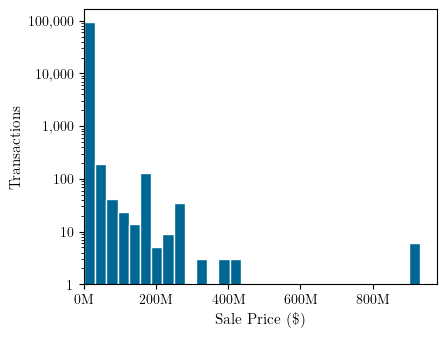

In [12]:
# Plot log histogram for targets
sf.plot_log_histogram(df.sale_price, save_as=f'../data/raw/histogram_log.pdf')

In [13]:
# Remove outliers before plotting target value histogram
target_values = df.sale_price.copy()
print(f'Number of rows before: {len(target_values)}')
print(f'Price range before: {min(target_values)} - {max(target_values)}')
q_low = target_values.quantile(0.025)
q_hi  = target_values.quantile(0.975)
target_values = target_values[(target_values < q_hi) & (target_values > q_low)]
print(f'Number of rows after: {len(target_values)}')
print(f'Price range after: {min(target_values)} - {max(target_values)}')

Number of rows before: 93427
Price range before: 0 - 931000000
Number of rows after: 65071
Price range after: 1 - 7287500


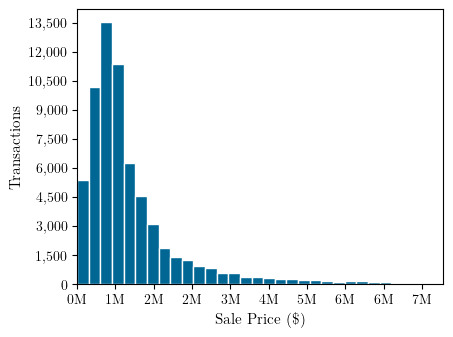

In [14]:
# Plot histogram for targets
sf.plot_histogram(target_values, save_as=f'../data/raw/histogram_rm-outliers.pdf')

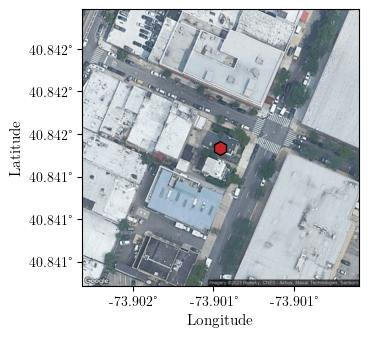

In [15]:
# Plot sample image at zoom level 19
index = 0
zoom_level = 19
sf.plot_satellite_image(
    index=index,
    location_lat=df.location_lat[index],
    location_long=df.location_long[index],
    zoom_level=zoom_level,
    save_as=f'../data/satellite-images_new-york-city_2022_640x640_{zoom_level}_{index}.pdf'
    )

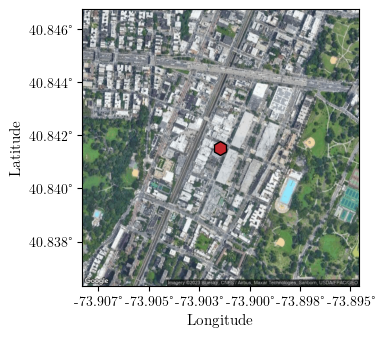

In [16]:
# Plot sample image at zoom level 16
index = 0
zoom_level = 16
sf.plot_satellite_image(
    index=index,
    location_lat=df.location_lat[index],
    location_long=df.location_long[index],
    zoom_level=zoom_level,
    save_as=f'../data/satellite-images_new-york-city_2022_640x640_{zoom_level}_{index}.pdf'
    )

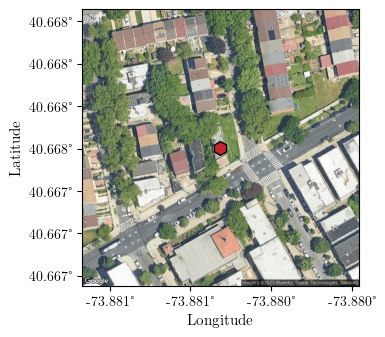

In [17]:
# Plot another sample image at zoom level 19
index = 20000
zoom_level = 19
sf.plot_satellite_image(
    index=index,
    location_lat=df.location_lat[index],
    location_long=df.location_long[index],
    zoom_level=zoom_level,
    save_as=f'../data/satellite-images_new-york-city_2022_640x640_{zoom_level}_{index}.pdf'
    )

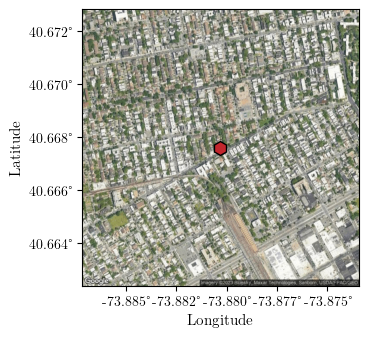

In [18]:
# Plot another sample image at zoom level 16
index = 20000
zoom_level = 16
sf.plot_satellite_image(
    index=index,
    location_lat=df.location_lat[index],
    location_long=df.location_long[index],
    zoom_level=zoom_level,
    save_as=f'../data/satellite-images_new-york-city_2022_640x640_{zoom_level}_{index}.pdf'
    )